In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [10]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpd: float
    boundary_percentage: float


In [21]:
#Define the functions of calculate different parameters
def calculate_str(state:BatsmanState) -> BatsmanState:
    sr = state['str'] = state['runs'] / state['balls'] * 100
    return {'sr':sr}

In [22]:
#calculate BPD
def calculate_bpd(state:BatsmanState) -> BatsmanState:
    bpd = state['bpd'] = state['balls'] / state['runs']
    return {'bpd':bpd}

In [23]:
#calculate boundary percentage
def calculate_boundary_percentage(state:BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixes']
    boundary_percentage = state['boundary_percentage'] = (total_boundaries/ state['balls'])*100
    return {'boundary_percentage': boundary_percentage}

In [25]:
#Generate the summary
def summary(state:BatsmanState) -> str:
    summary = f"""
    strike rate: {state['sr']}
    bpd: {state['bpd']}
    bundary percentage: {state['boundary_percentage']}
    """
    return {'summary': summary}

In [26]:
graph = StateGraph(BatsmanState)
#Add nodes to the graph
graph.add_node('calculate_str', calculate_str)
graph.add_node('calculate_bpd', calculate_bpd)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)
#Add edges to the graph
graph.add_edge(START,'calculate_str')
graph.add_edge(START,'calculate_bpd')
graph.add_edge(START,'calculate_boundary_percentage')

graph.add_edge('calculate_str', 'summary')
graph.add_edge('calculate_bpd', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')

graph.add_edge('summary', END)


#Compile the graph
workflow = graph.compile()
print(workflow)

In [28]:
intial_state = {
    'runs':110,
    'balls': 60,
    'fours':6,
    'sixes':4

}

final_workflow = workflow.invoke(intial_state)
print(final_workflow)

{'runs': 110, 'balls': 60, 'fours': 6, 'sixes': 4, 'sr': 183.33333333333331, 'bpd': 0.5454545454545454, 'boundary_percentage': 16.666666666666664}


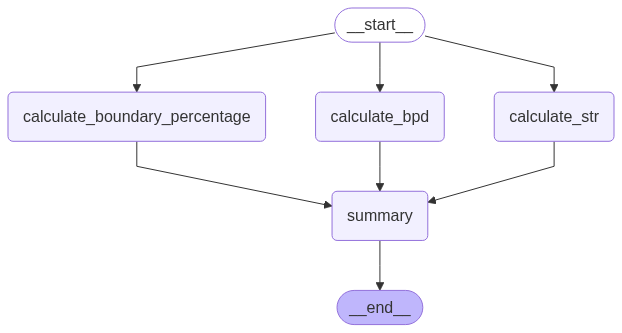

In [29]:
#show the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())